In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

qx_sim_results = np.load('./data/qaoa_maxcut_n4_p1_starmon5.npz', allow_pickle=True)
df_qx = pd.DataFrame.from_records(qx_sim_results['optimization_steps'])
df_qx

,cost,params,quantum_exec_time,quantum_total_time,quantum_wait_time
0,1.818359,"[5.091334031799866, 6.894025808199351]",0.155648,4652.769639,4652.613991
1,1.923828,"[5.091334031799866, 6.894025808199351]",0.155648,73.884639,73.728991
2,2.021484,"[5.091334031799866, 6.894025808199351]",0.155648,73.302149,73.146501
3,2.162109,"[5.091334031799866, 6.894025808199351]",0.155648,73.882670,73.727022
4,1.837891,"[5.091334031799866, 6.894025808199351]",0.155648,73.371683,73.216035
5,1.919922,"[5.091334031799866, 6.894025808199351]",0.155648,73.975419,73.819771
6,1.992188,"[5.091334031799866, 6.894025808199351]",0.155648,73.409835,73.254187
7,1.847656,"[5.091334031799866, 6.894025808199351]",0.155648,72.940861,72.785213
8,2.175781,"[5.091334031799866, 6.894025808199351]",0.155648,72.362078,72.206430
9,2.171875,"[5.091334031799866, 6.894025808199351]",0.155648,73.182823,73.027175


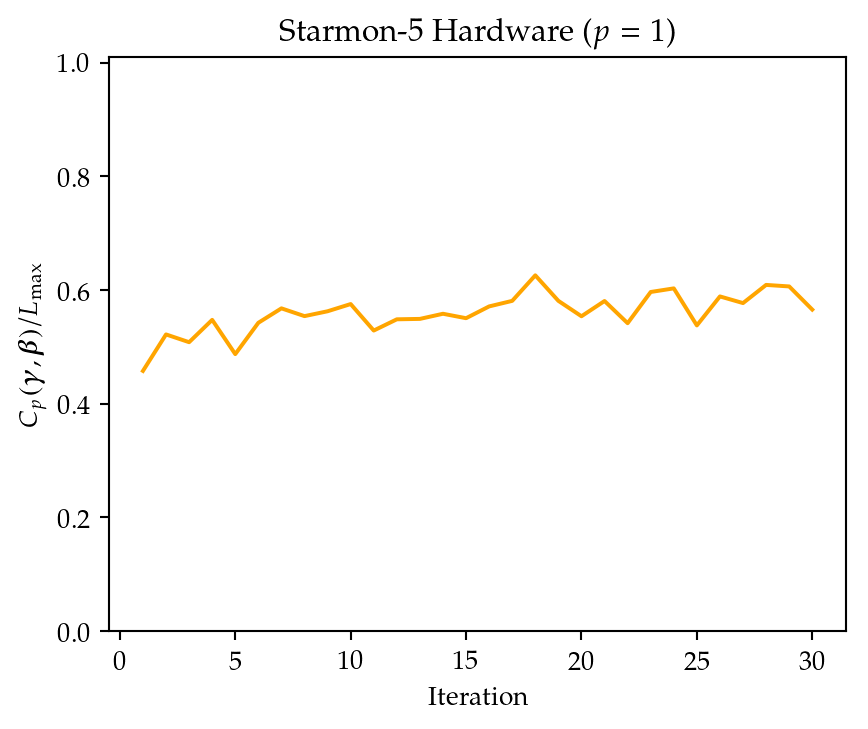

In [70]:
L_max = 4

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'''
\usepackage{palatino}
\usepackage{newpxmath}''')
plt.rc('font', family='serif')


fig, ax = plt.subplots(figsize=(5, 4), dpi=190)

ax.plot(range(1, len(df_qx)+1), df_qx['cost']/L_max, color='orange')

plt.ylim(bottom=0, top=1.01)
plt.title('Starmon-5 Hardware ($p = 1$)')
plt.xlabel('Iteration')
plt.ylabel(r'$C_p(\boldsymbol{\gamma}, \boldsymbol{\beta}) / L_\text{max}$')
plt.savefig('figures/qaoa_maxcut_n4_p1_starmon_optimization.pdf', bbox_inches='tight')
plt.show()

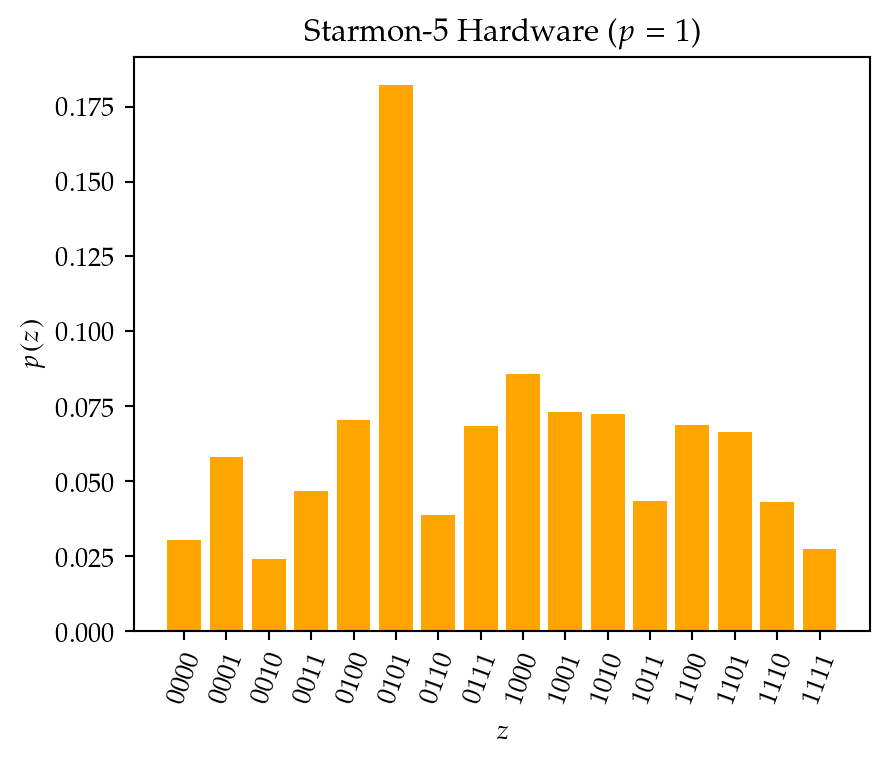

In [71]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=190)

probs = dict(np.ndenumerate(qx_sim_results['final_probs']))[()]
ax.bar(probs.keys(), probs.values(), color='orange')
plt.xticks(rotation=70)
plt.title('Starmon-5 Hardware ($p = 1$)')
plt.xlabel('$z$')
plt.ylabel(r'$p(z)$')
plt.savefig('figures/qaoa_maxcut_n4_p1_starmon_probs.pdf', bbox_inches='tight')
plt.show()